In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('u18_composite.csv')

# Calculate correlations for entire dataset
corr_matrix = df[['PTS/G', 'PPP', 'D1 PPG', 'Composite Score']].corr()


print(df['Composite Score'].describe()) 


count    126.000000
mean       0.445794
std        0.214157
min        0.107000
25%        0.279250
50%        0.415500
75%        0.596000
max        0.970000
Name: Composite Score, dtype: float64


In [23]:
print(corr_matrix)

                    PTS/G       PPP    D1 PPG  Composite Score
PTS/G            1.000000  0.567684  0.199603         0.456564
PPP              0.567684  1.000000  0.192674         0.381996
D1 PPG           0.199603  0.192674  1.000000         0.815090
Composite Score  0.456564  0.381996  0.815090         1.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           126 non-null    object 
 1   Synergy Role     126 non-null    object 
 2   Height           125 non-null    float64
 3   U18 Season       126 non-null    int64  
 4   PTS/G            126 non-null    float64
 5   PPP              126 non-null    float64
 6   D1 Conference    126 non-null    object 
 7   D1 School(s)     126 non-null    object 
 8   D1 Season        126 non-null    object 
 9   D1 PPG           118 non-null    float64
 10  Country          126 non-null    object 
 11  Composite Score  126 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 11.9+ KB


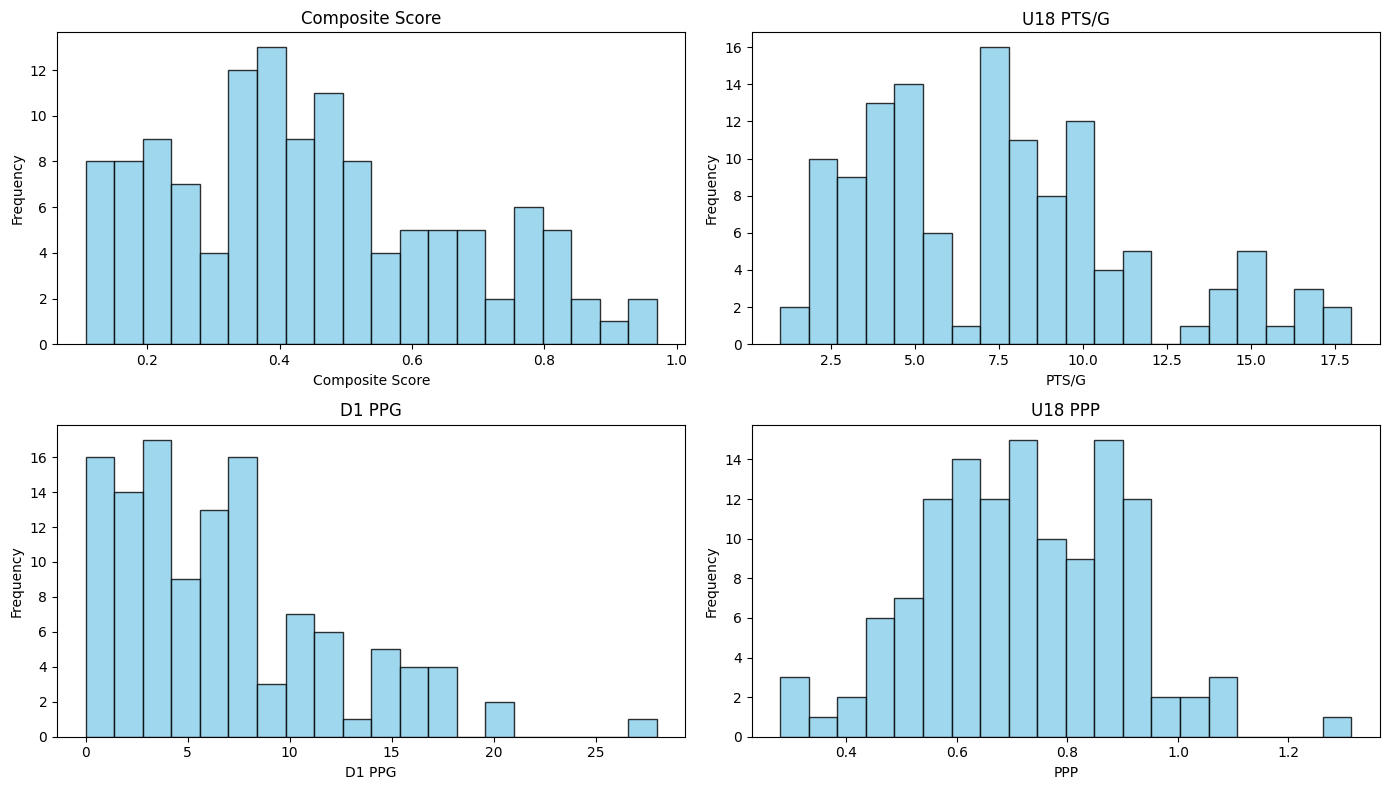

In [3]:
plt.figure(figsize=(14, 8))

columns = ['Composite Score', 'PTS/G', 'D1 PPG', 'PPP']
titles = ['Composite Score', 'U18 PTS/G', 'D1 PPG', 'U18 PPP']

for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
median_comp = df['Composite Score'].median()
# Plotting function
def plot_comparison(data, title):
    plt.figure(figsize=(12, 5))
    # Scatter: U18 PTS/G vs Composite Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='PTS/G', y='Composite Score', data=data)
    for i, row in data.iloc[::10].iterrows():  # Label every 7th player
        plt.text(row['PTS/G'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PTS/G vs Composite')
    
    # Scatter: U18 PPP vs Composite Score
    plt.subplot(1, 2, 2)
    sns.regplot(x='PPP', y='Composite Score', data=data)
    for i, row in data.iloc[::10].iterrows():
        plt.text(row['PPP'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PPP vs Composite')
    
    plt.tight_layout()
    plt.show()


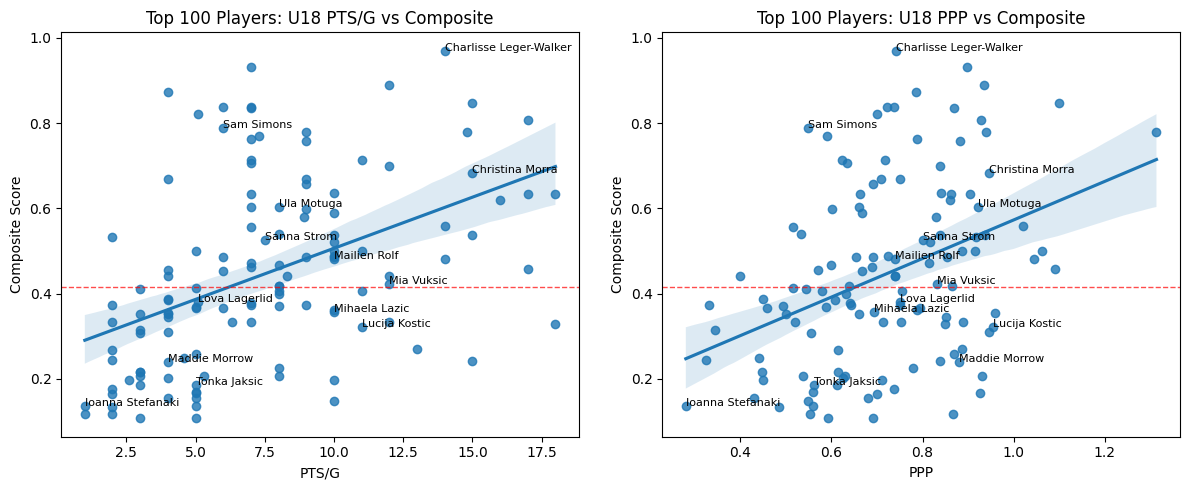

In [5]:

plot_comparison(df, 'Top 100 Players')


In [6]:
# Players with high Composite Score and low U18 PTS/G
low_ppg_high_median = df[(df['Composite Score'] > median_comp) & (df['PTS/G'] < 5)]
print(low_ppg_high_median[['Player','PTS/G','D1 School(s)','D1 PPG','Composite Score']].sort_values(by='Composite Score',ascending = False))

              Player  PTS/G         D1 School(s)  D1 PPG  Composite Score
3       Emme Shearer    4.0             Portland    17.0            0.872
21  Praise Egharevba    4.0             Oklahoma     NaN            0.670
39   Kobe King Hawea    2.0                Texas     4.0            0.533
55     Cynthia Ezeja    4.0                  LMU     6.0            0.455
57    Felicia Dourva    4.0  Fresno Pacific (D2)    12.0            0.440


In [7]:
# Players with low Composite Score and low U18 PTS/G
low_ppg_low_median = df[(df['Composite Score'] < median_comp) & (df['PTS/G'] < 5)]
#print(len(low_ppg_low_median))
low_ppg_low_median[['Player','D1 School(s)','PTS/G','PPP','Composite Score','Country']].sort_values(by='Composite Score',ascending = False)

,Player,D1 School(s),PTS/G,PPP,Composite Score,Country
64,Silvia Nativi,Louisiana Tech,3.0,0.544,0.410,Italy
68,Sofia Persson,FGCU,4.0,0.449,0.388,Sweden
69,Lara Langermann,New Mexico,4.0,0.608,0.385,Germany
73,Anastasia Drosouni,Cal,2.0,0.330,0.373,Greece
81,Cheyenne Rowe,UTSA,4.0,0.960,0.355,Canada
82,Alice Curman,SIU,3.0,0.660,0.353,Sweden
83,Grace Hunter,CSUB,4.0,0.500,0.352,New Zealand
84,Kiandre Browne,Duquesne,4.0,0.852,0.345,Canada
85,Nina Horvath,East Texas A&M,2.0,0.714,0.333,Germany
91,Vanessa Taylor,Elon,3.0,0.344,0.315,Sweden


In [8]:

# Print correlations
print("Top 100 Correlations:")
print(df[['PTS/G', 'PPP', 'D1 PPG']].corrwith(df['Composite Score']))


Top 100 Correlations:
PTS/G     0.456564
PPP       0.381996
D1 PPG    0.815090
dtype: float64


### I want to highlight these bad players. Give them a label and do a scatterplot.

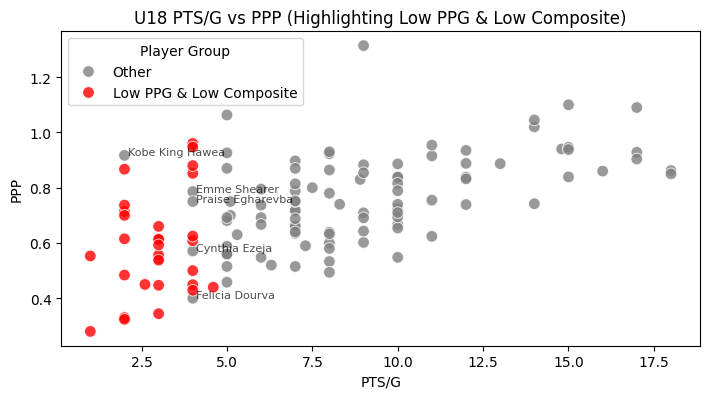

In [9]:
# Add a label column
df['Low Group'] = np.where(
    (df['Composite Score'] < median_comp) & (df['PTS/G'] < 5),
    'Low PPG & Low Composite',
    'Other'
)

plt.figure(figsize=(7.2, 4.1))
sns.scatterplot(
    data=df,
    x='PTS/G',
    y='PPP',
    hue='Low Group',
    palette={'Low PPG & Low Composite': 'red', 'Other': 'gray'},
    alpha=0.8,
    s=70
)
# Label players with PPG < 5 in the "Other" group
for _, row in df[(df['PTS/G'] < 5) & (df['Low Group'] == 'Other')].iterrows():
    plt.text(
        x=row['PTS/G'] + 0.1,  # Small offset to avoid overlap with point
        y=row['PPP'],
        s=row['Player'],
        fontsize=8,
        color='black',
        alpha=0.7
    )
plt.title('U18 PTS/G vs PPP (Highlighting Low PPG & Low Composite)')
plt.xlabel('PTS/G')
plt.ylabel('PPP')
plt.legend(title='Player Group')
plt.tight_layout()
plt.show()

## Synergy Role Analysis


Performance by Synergy Role:
                         PTS/G     PPP  D1 PPG  Composite Score  Count
Synergy Role                                                          
Secondary Ball Handler    9.00  0.6920    13.0           0.6570      9
Spot Up Shooting Wing     5.30  0.7370     7.0           0.6330     11
Dynamic Shooting Wing    10.00  0.8350     8.0           0.5275     10
Playmaking Big           10.50  0.8570     7.3           0.5035      6
Slashing Wing             8.15  0.7450     6.5           0.4600     16
Rim Finishing Big         8.00  0.8830     4.0           0.4570      7
Post-Up Big               7.00  0.7900     5.0           0.4165     14
Scoring Ball Handler     11.00  0.7800     8.0           0.4070      3
Playmaking Ball Handler   7.50  0.6615     7.5           0.3645      6
Playmaking Wing           7.00  0.6115     5.0           0.3550     22
-                         2.00  0.7140     3.0           0.3100     13
Stretch Big               5.00  0.5930     2.0 

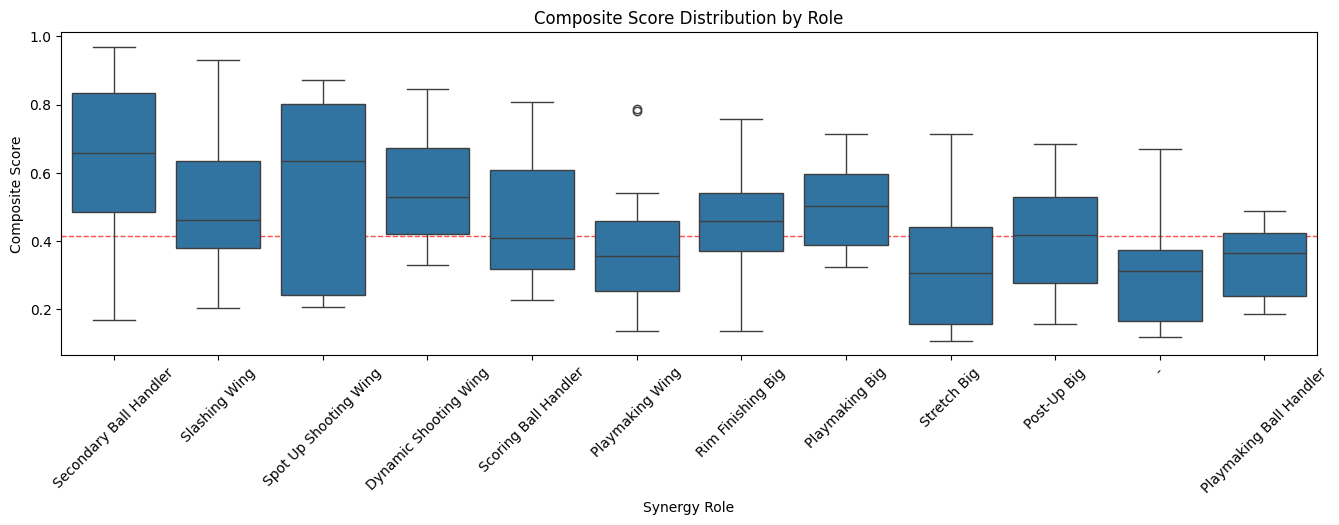

In [10]:
# Group by role and calculate medians
role_stats = df.groupby('Synergy Role').agg({
    'PTS/G': 'median',
    'PPP': 'median',
    'D1 PPG': 'median',
    'Composite Score': 'median',
    'Player': 'count'
}).rename(columns={'Player': 'Count'}).sort_values('Composite Score', ascending=False)

print("\nPerformance by Synergy Role:")
print(role_stats)

# Visualization
plt.figure(figsize=(16.2, 4.2))
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
sns.boxplot(x='Synergy Role', y='Composite Score', data=df)
plt.xticks(rotation=45)
plt.title('Composite Score Distribution by Role')
plt.show()

In [11]:

print("\nPlaymaking Big Players:")
playmaking_big = df[df['Synergy Role'] == 'Playmaking Big']
print(playmaking_big[['Player', 'PTS/G', 'PPP', 'D1 PPG', 'Composite Score']].sort_values(by='Composite Score', ascending=False))



Playmaking Big Players:
                 Player  PTS/G    PPP  D1 PPG  Composite Score
16  Ioanna Chatzileonti   11.0  0.624    10.0            0.713
28        Tilda Trygger   16.0  0.860     6.6            0.620
41       Angeliki Ziaka   10.0  0.816     8.0            0.522
48        Marah Dykstra    9.0  0.854    12.0            0.485
81        Cheyenne Rowe    4.0  0.960     6.0            0.355
90        Lucija Kostic   11.0  0.954     2.0            0.322


# height analyiss

/var/folders/qh/zhr4gq8s5px2ff46zwfdk90hy3y30j/T/ipykernel_12405/2496739239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


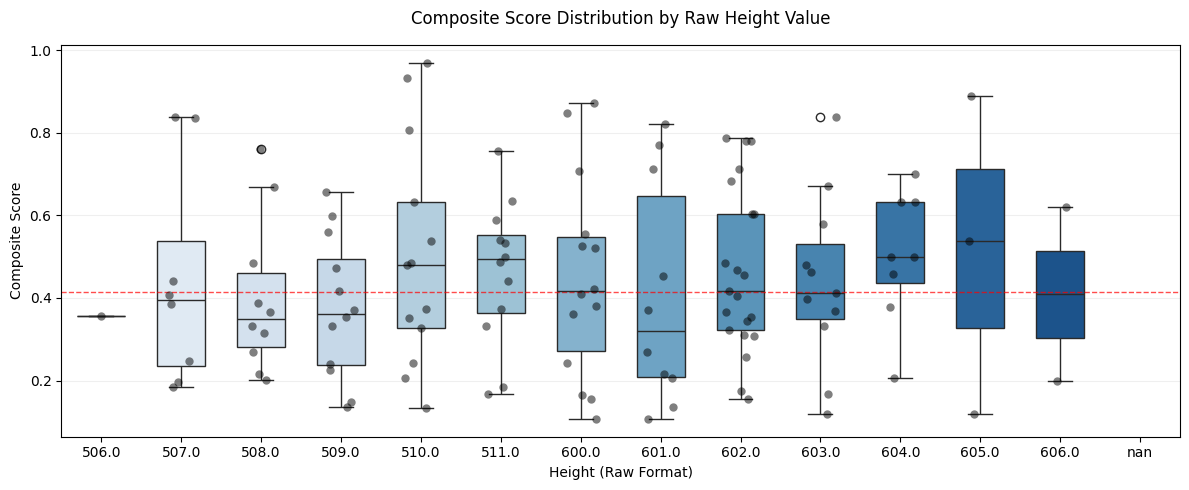

In [12]:

# Boxplot using raw height bins
height_order = sorted(df['Height'].unique())
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='Height',
    y='Composite Score',
    data=df,
    order=height_order,
    palette='Blues',
    width=0.6
)

# Add individual data points
sns.stripplot(
    x='Height',
    y='Composite Score',
    data=df,
    order=height_order,
    color='black',
    alpha=0.5,
    jitter=0.2,
    size=6
)

plt.title('Composite Score Distribution by Raw Height Value', pad=15)
plt.xlabel('Height (Raw Format)')
plt.ylabel('Composite Score')
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True, axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

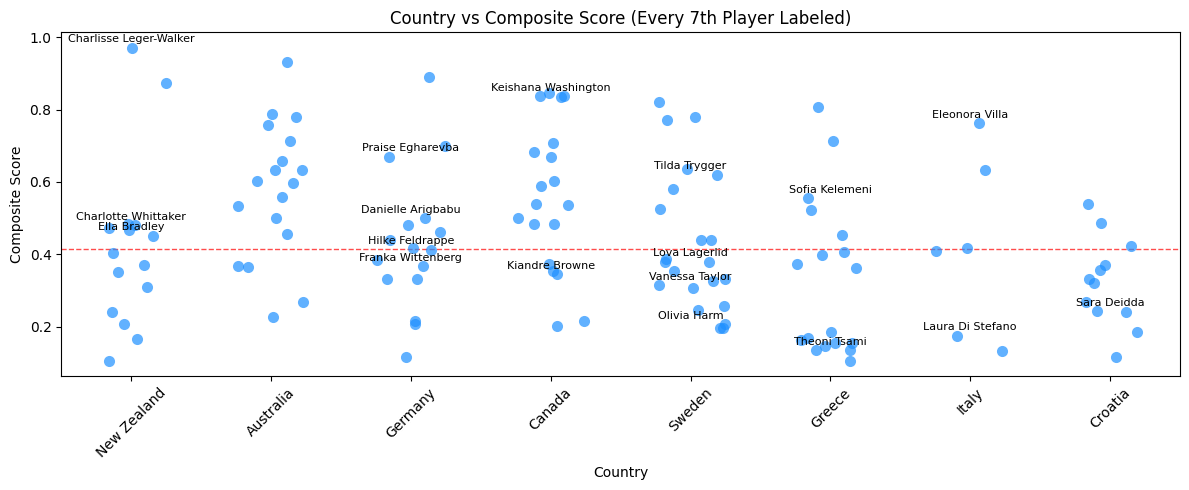

In [13]:
# Scatterplot: Country vs Composite Score, label every 7th player
plt.figure(figsize=(12, 5))
sns.stripplot(
    x='Country',
    y='Composite Score',
    data=df,
    jitter=0.25,
    alpha=0.7,
    size=8,
    color='dodgerblue'
)
# Label every 7th player
for i, row in df.iloc[::7].iterrows():
    plt.text(
        x=list(df['Country'].unique()).index(row['Country']),
        y=row['Composite Score'] + 0.01,
        s=row['Player'],
        fontsize=8,
        ha='center',
        va='bottom'
    )
plt.title('Country vs Composite Score (Every 7th Player Labeled)')
plt.xlabel('Country')
plt.ylabel('Composite Score')
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Player,Synergy Role,Height,U18 Season,PTS/G,PPP,D1 Conference,D1 School(s),D1 Season,D1 PPG,Country,Composite Score,Low Group
0,Charlisse Leger-Walker,Secondary Ball Handler,510.0,2018,14.0,0.742,PAC12,Washington St.,22-23,18.0,New Zealand,0.970,Other
1,Tess Heal,Slashing Wing,510.0,2022,7.0,0.897,WCC,Santa Clara,24-25,20.0,Australia,0.932,Other
2,Nyara Sabally,Slashing Wing,605.0,2018,12.0,0.935,PAC12,Oregon,21-22,15.0,Germany,0.890,Other
3,Emme Shearer,Spot Up Shooting Wing,600.0,2018,4.0,0.786,WCC,Portland,24-25,17.0,New Zealand,0.872,Other
4,Tyana Todd,Dynamic Shooting Wing,600.0,2022,15.0,1.100,ACC,Boston College,24-25,14.0,Canada,0.847,Other


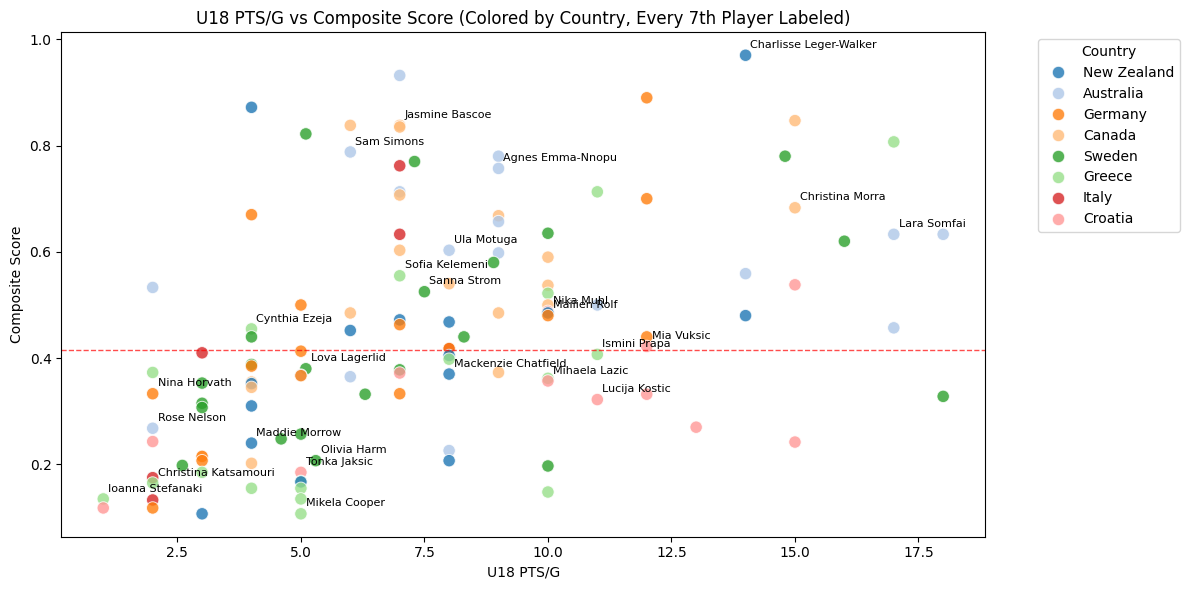

In [ ]:
# Scatterplot: PTS/G vs Composite Score, colored by Country, label every 7th player
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='PTS/G',
    y='Composite Score',
    hue='Country',
    palette='tab20',
    s=80,
    alpha=0.8,
    edgecolor='white',
    linewidth=0.7
)

# Label every 4th player
for i, row in df.iloc[::4].iterrows():
    plt.text(
        x=row['PTS/G'] + 0.1,
        y=row['Composite Score'] + 0.01,
        s=row['Player'],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.title('U18 PTS/G vs Composite Score (Colored by Country, Every 7th Player Labeled)')
plt.xlabel('U18 PTS/G')
plt.ylabel('Composite Score')
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()

### Composite Scores by Country

In [22]:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Prepare data
countries = df['Country'].unique()
median_comp = df['Composite Score'].median()

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))
plt.close()  # Prevents duplicate display in notebooks

# Initialize empty plot
scatter = ax.scatter([], [], s=80, alpha=0.8, edgecolor='white', linewidth=0.7)
ax.set_xlim(df['PTS/G'].min()-1, df['PTS/G'].max()+1)
ax.set_ylim(df['Composite Score'].min()-0.05, df['Composite Score'].max()+0.05)
ax.set_xlabel('U18 PTS/G')
ax.set_ylabel('Composite Score')
ax.axhline(median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
title = ax.set_title('Adding: ')

# Color palette
palette = sns.color_palette('tab20', len(countries))
country_colors = dict(zip(countries, palette))

# Animation function
def update(frame):
    current_countries = countries[:frame+1]
    current_data = df[df['Country'].isin(current_countries)]
    
    # Clear and redraw
    ax.clear()
    
    # Scatter plot
    for country in current_countries:
        country_data = df[df['Country'] == country]
        ax.scatter(
            x=country_data['PTS/G'],
            y=country_data['Composite Score'],
            color=country_colors[country],
            label=country,
            s=80,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.7
        )
    
    # Label every 4th player in current countries
    for i, row in current_data.iloc[::4].iterrows():
        ax.text(
            x=row['PTS/G'] + 0.1,
            y=row['Composite Score'] + 0.01,
            s=row['Player'],
            fontsize=8,
            ha='left',
            va='bottom'
        )
    
    # Re-add reference line and formatting
    ax.axhline(median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_xlim(df['PTS/G'].min()-1, df['PTS/G'].max()+1)
    ax.set_ylim(df['Composite Score'].min()-0.05, df['Composite Score'].max()+0.05)
    ax.set_xlabel('U18 PTS/G')
    ax.set_ylabel('Composite Score')
    ax.set_title(f'Countries Added: {", ".join(current_countries)}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

# Create animation
ani = FuncAnimation(
    fig, 
    update, 
    frames=len(countries),
    interval=3000,  # 1 second between frames
    repeat=False
)

# Display in notebook
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

/var/folders/qh/zhr4gq8s5px2ff46zwfdk90hy3y30j/T/ipykernel_12405/932623587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


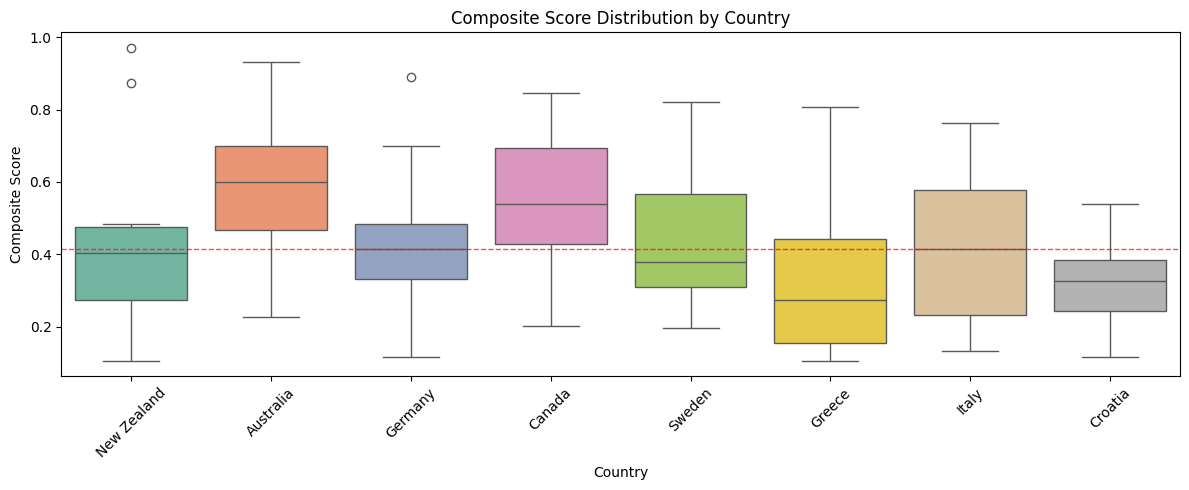

In [15]:
# Boxplot: Composite Score by Country
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='Country',
    y='Composite Score',
    data=df,
    palette='Set2'
)
plt.title('Composite Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Composite Score')
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Group by country and aggregate composite scores
country_stats = df.groupby('Country')['Composite Score'].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values('mean', ascending=False)

# Rename columns for clarity
country_stats = country_stats.rename(columns={
    'count': 'Player Count',
    'mean': 'Avg Composite Score',
    'median': 'Median Score',
    'min': 'Min Score',
    'max': 'Max Score'
})

# Format the table nicely
print("Country Performance Summary (Sorted by Avg Composite Score)")
print("="*60)
print(country_stats.round(2).to_string())  # Rounds to 2 decimal places

Country Performance Summary (Sorted by Avg Composite Score)
             Player Count  Avg Composite Score  Median Score  Min Score  Max Score
Country                                                                           
Australia              18                 0.58          0.60       0.23       0.93
Canada                 19                 0.56          0.54       0.20       0.85
Germany                16                 0.43          0.42       0.12       0.89
Sweden                 22                 0.43          0.38       0.20       0.82
New Zealand            15                 0.42          0.40       0.11       0.97
Italy                   6                 0.42          0.41       0.13       0.76
Greece                 18                 0.33          0.27       0.11       0.81
Croatia                12                 0.32          0.33       0.12       0.54


### for duplicate synergy stats, we just take the better year.
### for college stats we have to composite scores. career_composite and best_composite. but we need to figure some clever way to do the career composite which is a function of team/conference strength